In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def readInput (fileName):
    '''
    * takes as input fileName of the data file.
    * returns pandas dataframe for the data.
    '''
    df = pd.read_csv (fileName, header=None)
    return df

In [3]:
def perceptron(data, lr = 1):
    ''' 
    * implements perceptron learning algorithm
    * data is assumed to be a pandas dataframe with column names as [0,1,2...] 
    * final learned weight w is returned as np array.
    '''
    iter = 0
    w_hist = []
    feat_len = len(data.columns) - 1
    w = np.random.randn(feat_len + 1)
    result = []
    while True:
        w_hist.append (w)
        flag = True
        for i in range (0, len(data)):
            x = np.array([1] + [data.iloc[i, el] for el in range (0, feat_len)])
            y = data.iloc[i, feat_len]
            predicted = int(np.dot(w, x) >= 0)
            if y != predicted:
                flag = False
                v = 2 * y - 1
                w = w + lr * v * x
            
        iter += 1
        if iter == 1e2 or flag:
            break
            
    if iter == 1e2:
        print ("Does not converge.")
    else:
        print ("Converged in {} steps.".format(iter))
        
    return w, w_hist
        

In [4]:
def plot_output (data, w):
    zx = []
    zy = []
    ox = []
    oy = []
    feat_len = len(data.columns) - 1
    for i in range (0, len(data)):
        if (data.iloc[i, feat_len] == 1):
            ox.append (data.iloc[i, 0])
            oy.append (data.iloc[i, 1])
        else:
            zx.append (data.iloc[i, 0])
            zy.append (data.iloc[i, 1])
    plt.plot (zx, zy, 'r.', label='0')
    plt.plot (ox, oy, 'b.', label='1')
    minx = min(min(zx), min(ox))
    maxx = max(max(zx), max(ox))
    miny = - (w[0] + w[1] * minx) / (w[2])
    maxy = - (w[0] + w[1] * maxx) / (w[2])
    plt.plot ([minx, maxx], [miny, maxy], 'o-')
    plt.show()
        

In [5]:
def calculate_loss(data, w):
    loss = 0
    feat_len = len(data.columns) - 1
    for i in range (0, len(data)):
        x = np.array([1] + [data.iloc[i, el] for el in range (0, feat_len)])
        y = data.iloc[i, feat_len]
        predicted = int(np.dot(w, x) >= 0)
        if y != predicted:
            loss += 1
    return loss

Does not converge.


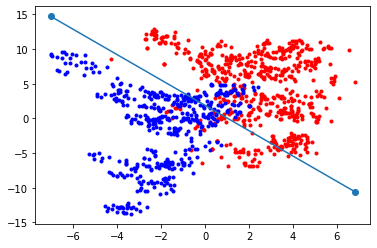

In [6]:
from sklearn.model_selection import train_test_split

df = readInput('Dataset Question2.csv')
train_df, test_df = train_test_split(df, test_size=0.2)
w, w_hist = perceptron(train_df, lr = 1)
# Plot for training data.
plot_output (train_df, w)

These plots are drawn using the 1st 2 features.

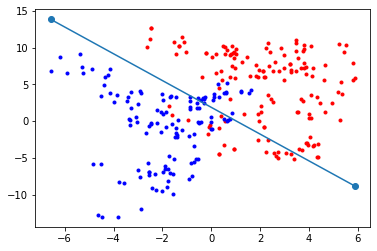

In [7]:
# Plot for test data
plot_output (test_df, w)

loss and classification error are identical for perceptron so drawing only 1 graph.

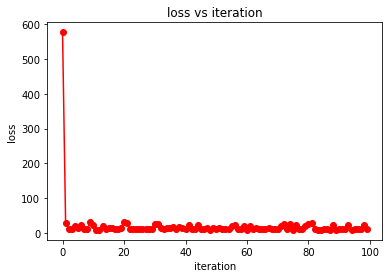

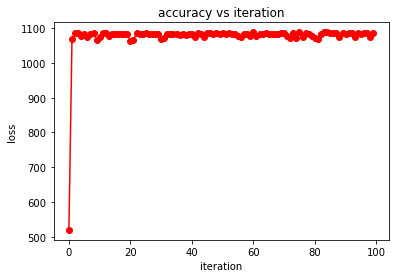

In [8]:
def plot_loss(data, w_hist):
    loss_ar = []
    for w in w_hist:
        loss_ar.append (calculate_loss(data, w))

    plt.title('loss vs iteration')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.plot (range(0, len(loss_ar)), loss_ar, 'ro-')
    plt.show()

    accuracy = [(len(train_df) - x) for x in loss_ar]
    plt.title('accuracy vs iteration')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.plot (range(0, len(accuracy)), accuracy, 'ro-')
    plt.show()
    
plot_loss (train_df, w_hist)


In [9]:
def metrics (data, w):
    tp, tn, fp, fn = 0, 0, 0, 0
    loss = 0
    feat_len = len(data.columns) - 1
    for i in range (0, len(data)):
        x = np.array([1] + [data.iloc[i, el] for el in range (0, feat_len)])
        y = data.iloc[i, feat_len]
        predicted = int(np.dot(w, x) >= 0)
        if predicted == y:
            if predicted == 1:
                tp += 1
            else:
                tn += 1
        else:
            if predicted == 1:
                fp += 1
            else:
                fn += 1
    print ('True positives = {}'.format(tp))
    print ('True negatives = {}'.format(tn))
    print ('False positives = {}'.format(fp))
    print ('False negatives = {}'.format(fn))
    print ('Classification accuracy = {}%'.format((tp + tn) / len(data) * 100))
    return tp, tn, fp, fn

In [10]:
print ('For training data')
metrics(train_df, w)

For training data
True positives = 481
True negatives = 607
False positives = 7
False negatives = 2
Classification accuracy = 99.179580674567%


(481, 607, 7, 2)

In [11]:
print ('For test data')
metrics(test_df, w)

For test data
True positives = 127
True negatives = 145
False positives = 3
False negatives = 0
Classification accuracy = 98.9090909090909%


(127, 145, 3, 0)

In [12]:
print ('There are {} elements in training data.'.format(len(train_df)))
train_df.head()

There are 1097 elements in training data.


,0,1,2,3,4
1271,3.7022,6.99420,-1.851100,-0.12889,0
1030,4.6439,-3.37290,2.597600,0.55257,0
1309,2.0153,0.43661,4.586400,-0.31510,0
1146,-2.1786,-6.44790,6.034400,-0.20777,1
270,-6.3364,9.28480,0.014275,-6.78440,1


In [13]:
print ('There are {} elements in test data.'.format(len(test_df)))
test_df.head()

There are 275 elements in test data.


,0,1,2,3,4
1312,3.94140,-3.29020,3.1674,1.08660,0
598,2.98560,7.26730,-0.4090,-2.24310,0
1352,-1.42330,-0.98912,2.3586,0.39481,1
60,-0.86339,1.93480,-2.3729,-1.08970,1
53,-2.57540,-5.65740,6.1030,0.65214,1


In [14]:
def calc_norm_param (ar):
    avg = sum(ar) / len(ar)
    a = [abs(el - avg) for el in ar]
    mv = max (a)
    return avg, mv

def apply_norm (ar, avg, mv):
    a = [(0.5 + (el - avg) / (2 * mv)) for el in ar]
    return a
    

In [15]:
import copy
feat_len = len(train_df.columns) - 1
norm_train_df = copy.copy(train_df)
norm_test_df = copy.copy(test_df)
for i in range (0, feat_len):
    mean, d = calc_norm_param(train_df.iloc[:, i])
    norm_train_df.iloc[:, i] = apply_norm (norm_train_df.iloc[:, i], mean, d)
    norm_test_df.iloc[:, i] = apply_norm (norm_test_df.iloc[:, i], mean, d)

In [16]:
norm_train_df.head()


,0,1,2,3,4
1271,0.715815,0.664230,0.399462,0.569238,0
1030,0.778553,0.332644,0.534539,0.615313,0
1309,0.603429,0.454489,0.594925,0.556649,0
1146,0.324020,0.234292,0.638891,0.563905,1
270,0.047016,0.737493,0.456101,0.119252,1


Going with a smaller learning rate as 1 is too high for values this small.

Does not converge.


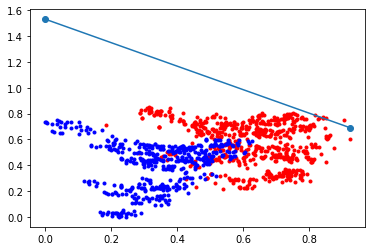

In [17]:
norm_w, norm_w_hist = perceptron(norm_train_df, lr = 0.01)
# Plot for training data.
plot_output (norm_train_df, norm_w)

It looks like perceptron algorithm doesn't work so well, but this graph is drawn for the 1st 2 feature values only.

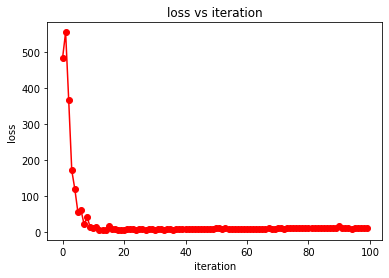

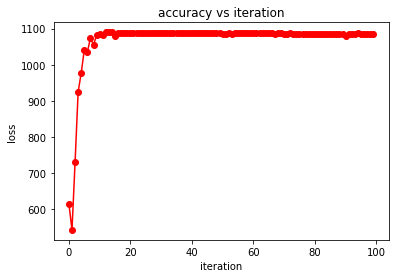

In [18]:
plot_loss (norm_train_df, norm_w_hist)


In [19]:
print ('For training data')
metrics(norm_train_df, w)

For training data
True positives = 349
True negatives = 611
False positives = 3
False negatives = 134
Classification accuracy = 87.51139471285325%
For test data
True positives = 94
True negatives = 147
False positives = 1
False negatives = 33
Classification accuracy = 87.63636363636364%


(94, 147, 1, 33)

In [20]:
print ('For test data')
metrics(norm_test_df, w)

For test data
True positives = 94
True negatives = 147
False positives = 1
False negatives = 33
Classification accuracy = 87.63636363636364%


(94, 147, 1, 33)

We see that accuracy has gone down from 98% to 87%.